# Question 9

### Setting up the equations:

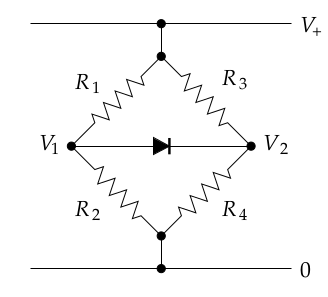


Let us assume:
$i_0$ leaves the $V_+$ side. It gets divided into 2 parts, 1 part, $i_1$ goes towards the wire having resistance $R_1$, $(i_0-i_1)$ goes towards the wire having resistance $R_3$, Now, from the point having the potential $V_1$ we have a current stream of current $i$, going through the diode towards the point having potential $V_2$, so the current flowing through the resistance $R_2$, is $i_1-i$ and through resistance $R_4$ is $i_0-i_1+i$

From the potential resistance equations we clearly get:

\begin{equation}i_1R_1 = V_+-V_1
\end{equation}

\begin{equation}(i_0-i_1)R_3=V_+ - V_2
\end{equation}

\begin{equation}V_1=(i_1-i)R_2
\end{equation}

\begin{equation}V_2=(i_0-i_1+i)R_4
\end{equation}

\begin{equation}i=I_0(e^\frac{V_1-V_2}{V_T}-1)
\end{equation}

From combining equation eq(1) and eq(5) and substituting into eq(3), we get:

$$V_1= [\frac{V_+ - V_1}{R_1} - I_0(e^\frac{V_1-V_2}{V_T}-1)]R_2$$

SImilarly, for $V_2$, we can write:

$$V_2= [\frac{V_+ - V_2}{R_3} + I_0(e^\frac{V_1-V_2}{V_T}-1)]R_4$$


rearranging these equations a little bit we have: 

$$V_1= \frac{V_+ - I_0R_1(e^\frac{V_1-V_2}{V_T}-1)}{1+\frac{R_1}{R_2}}$$
$$V_2= \frac{V_+ + I_0R_3(e^\frac{V_1-V_2}{V_T}-1)}{1+\frac{R_3}{R_4}}$$

if we write $\Delta V$, as $V_1-V_2$, then our equation simply becomes: 

$$\Delta V= V_+(\frac{1}{R_{12}}- \frac{1}{R_{34}}) -  I_0(e^\frac{V_1-V_2}{V_T}-1)(\frac{R_1}{R_{12}}+ \frac{R_3}{R_{34}})$$

where, $R_{12}=1 +\frac{R_1}{R_2}$, and same for $R_{34}$,

after that we can also re-arrange the equations to obtain:

$$V_1R_3R_{12}+V_2R_1R_{34}=(R_3 + R_1)V_+$$

from which we can then obtain the individual values of $V_1$ and $V_2$.



(-2.0, 2.0)

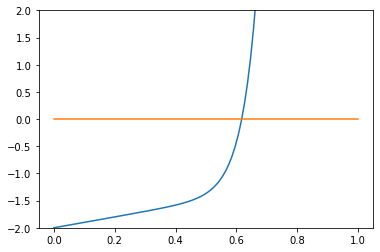

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Here, x represents \Del V
def func(x, V_T, I_0, Vp, R1, R2, R3, R4):
  R12= 1 + R1/R2
  R34= 1 + R3/R4
  return x - (Vp)*(1/R12 - 1/R34) + I_0*(math.exp(x/V_T)-1)*(R1/R12 +R3/R34)

R1=1e3
R2=4e3
R3=3e3
R4=2e3
V_T=0.05
I_0=3e-9
Vp=5

def f(x):
  return func(x, V_T, I_0, Vp, R1, R2, R3, R4)




x=np.linspace(0,1,100)
y=[]
for i in range(0, len(x)):
  y.append(f(x[i]))

plt.plot(x,y)
plt.plot(x, np.zeros(len(x)))
plt.ylim(-2,2)
plt.show()


In [ ]:
# clearly, the root is between 0.8 and 1. Apply newton method. But for that we need to first define the derivative.
 #which is doable given the analytical form of the functionn. 


def d_func(x, V_T, I_0, Vp, R1, R2, R3, R4):
   R12= 1 + R1/R2
   R34= 1 + R3/R4
   return 1 + (I_0/V_T)*(math.exp(x/V_T))*(R1/R12 +R3/R34)


def d_f(x):
  return d_func(x, V_T, I_0, Vp, R1, R2, R3, R4)


def newton(f, d_f, guess, tol):
  x=guess
  while(np.abs(f(x))>tol):
    x=x-f(x)/d_f(x)
  return x

guess=0.4
tol=1e-10
DelV=newton(f, d_f, guess, tol)
print(newton(f, d_f, guess, tol))




0.6173865471477628


From the last equation, we get: 
$$V_2 = \frac{(R_1+R_3)V_+-\Delta V R_3R_{12}}{R_3R_{12}+R_1R_{34}}$$

In [ ]:
R12= 1 + R1/R2
R34= 1 + R3/R4

V_2 = ((R1+R3)*Vp - DelV * R12*R3)/(R3*R12 + R1*R34)
V_1 = V_2 + DelV

print('V_1 and V_2 in volts are:')
print(V_1, V_2)

V_1 and V_2 in volts are:
3.446954618859105 2.8295680717113423


The volrage across the diode in this case was, around 0.97 V which is pretty small and close to 0.6 V. This will not increase further because there is an exponential pickup in the function as seen in the graph after 0.8. Due to this, no matter how much the resistances may be, (**given that the diode is indeed forward biased**), the voltage would not far exceed 0.6 Volts. We can demonstrate this by changing the value of the resistances. Example 1, make $R_4=0.1$, decrease $R_4$ step by step,increasing $R_3$, has similar effect.

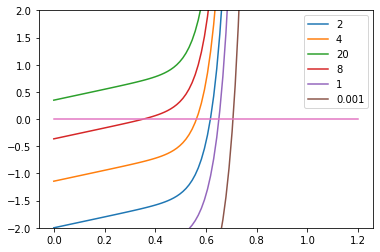

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Here, x represents \Del V
def func1(x, V_T, I_0, Vp, R1, R2, R3, R4):
  R12= 1 + R1/R2
  R34= 1 + R3/R4
  return x - (Vp)*(1/R12 - 1/R34) + I_0*(math.exp(x/V_T)-1)*(R1/R12 +R3/R34)

R1=1e3
R2=4e3
R3=3e3
R4=2e3
V_T=0.05
I_0=3e-9
Vp=5

def f(x,R4):
  return func1(x, V_T, I_0, Vp, R1, R2, R3, R4)




x=np.linspace(0,1.2,100)
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
for i in range(0, len(x)):
  y1.append(f(x[i],2e3))
  y2.append(f(x[i],4e3))
  y3.append(f(x[i],20e3))
  y4.append(f(x[i],8e3))
  y5.append(f(x[i],1e3))
  y6.append(f(x[i],0.0001e3))

plt.plot(x,y1, label='2')
plt.plot(x,y2, label='4')
plt.plot(x,y3, label='20')
plt.plot(x,y4, label='8')
plt.plot(x,y5, label='1')
plt.plot(x,y6, label='0.001')

plt.plot(x, np.zeros(len(x)))
plt.ylim(-2,2)
plt.legend()



Clearly, can it be seen that the graphs cross 0,nearly at 0.6 it never breaches 1. If the graph is crossing 0 in the linear region or is starting from above 0, then that implies the diode is not forward biased, as in the case of $R_4=8, 20$